Improting the Modules

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns


Path to .csv format of data

In [38]:
PATH_TO_TSLA_CLEAN = "../data/processed/TSLA_clean.csv"
PATH_TO_TSLA_CLEAN

'../data/processed/TSLA_clean.csv'

Load the data

In [39]:
# Load cleaned data
df = pd.read_csv(PATH_TO_TSLA_CLEAN, parse_dates=['Date'])
df

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_20,MACD,Signal Line
0,2024-05-31,178.080002,180.320007,173.820007,178.500000,67314600.0,NaN,NaN,178.080002,NaN,0.000000,0.000000
1,2024-06-03,176.289993,182.639999,174.490005,178.130005,68568900.0,NaN,NaN,177.909525,NaN,-0.142793,-0.028559
2,2024-06-04,174.770004,177.759995,174.000000,174.779999,60056300.0,NaN,NaN,177.610523,NaN,-0.374293,-0.097705
3,2024-06-05,175.000000,176.149994,172.130005,175.350006,57953800.0,NaN,NaN,177.361902,NaN,-0.533055,-0.184775
4,2024-06-06,177.940002,179.729996,172.729996,174.600006,69887000.0,NaN,NaN,177.416959,NaN,-0.416836,-0.231187
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2025-05-23,339.339996,343.179993,333.209991,337.920013,84654800.0,311.827502,276.903002,315.613118,68.321760,20.176387,17.988197
246,2025-05-27,362.890015,363.790009,347.320007,347.350006,120146400.0,315.678003,279.161202,320.115680,72.510958,21.409040,18.672365
247,2025-05-28,356.899994,365.000000,355.910004,364.839996,91404300.0,318.921503,281.539002,323.618948,68.980036,21.652980,19.268488
248,2025-05-29,358.429993,367.709991,356.000000,365.290009,88545700.0,322.735002,284.201402,326.934285,73.460459,21.719394,19.758669


Analysis

Calculate daily yield

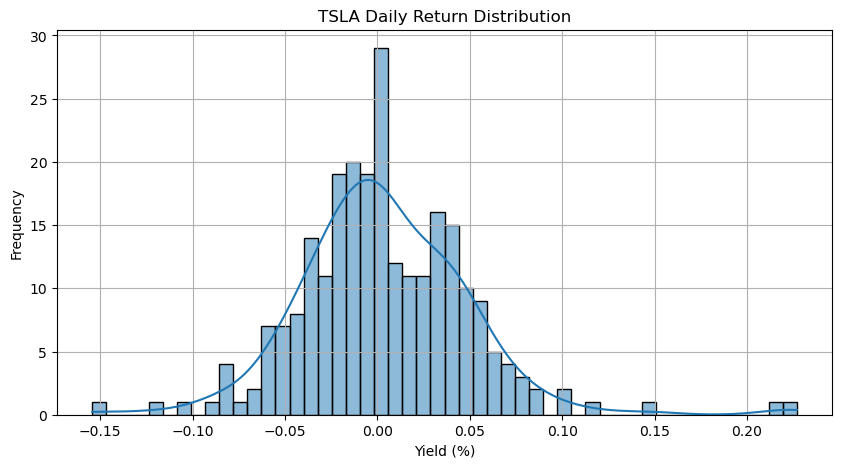

In [40]:
df['Daily Return'] = df['Close'].pct_change()

# Draw the yield distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('TSLA Daily Return Distribution')
plt.xlabel('Yield (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Calculate Volatility by month or quarter

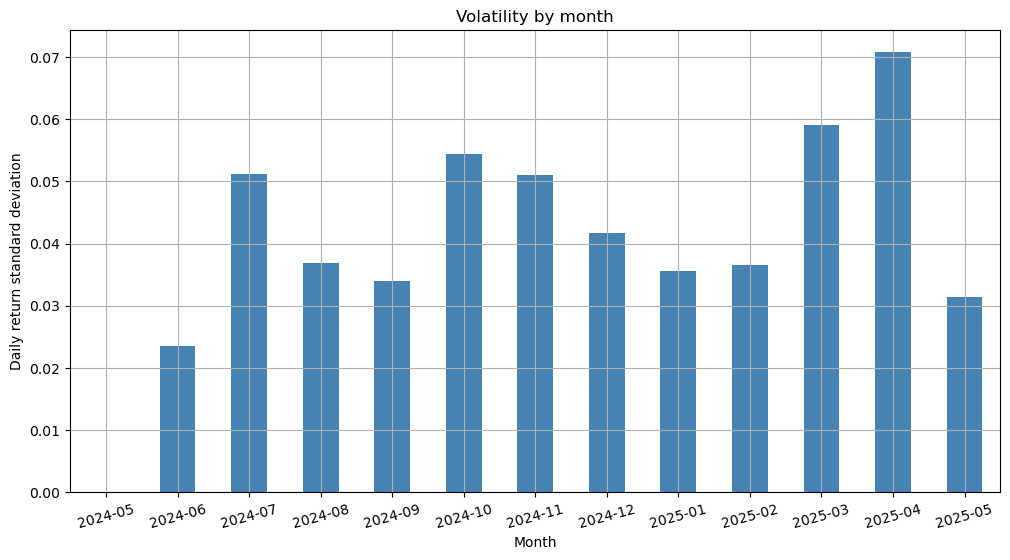

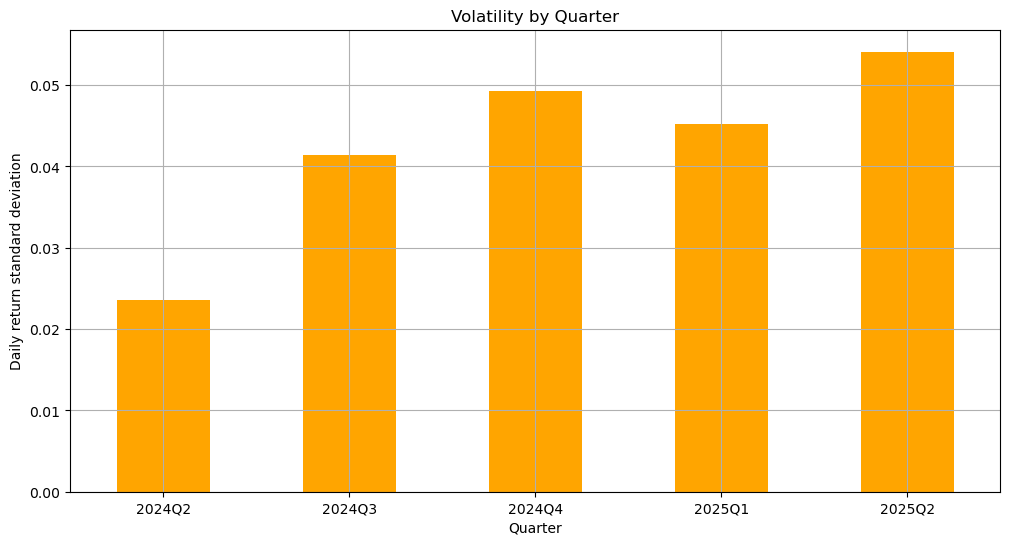

In [41]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_volatility = df.groupby('Month')['Daily Return'].std()

df['Quarter'] = df['Date'].dt.to_period('Q')
quarterly_volatility = df.groupby('Quarter')['Daily Return'].std()

# Volatility by Month
monthly_volatility.plot(kind='bar', figsize=(12, 6), color='steelblue')
plt.title('Volatility by month')
plt.ylabel('Daily return standard deviation')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()

#Volatility by Quarter
quarterly_volatility.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Volatility by Quarter')
plt.ylabel('Daily return standard deviation')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Correlation analysis between closing price and SMA, RSI indicators

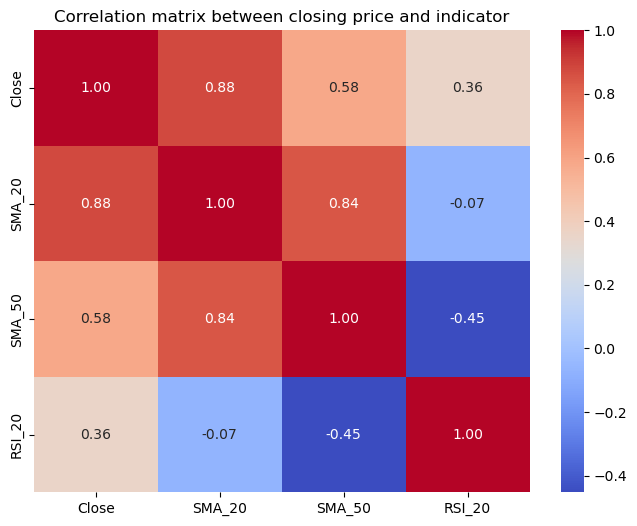

In [42]:
correlation_data = df[['Close', 'SMA_20', 'SMA_50', 'RSI_20']].dropna()

correlation_matrix = correlation_data.corr()

# Draw heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix between closing price and indicator')
plt.show()

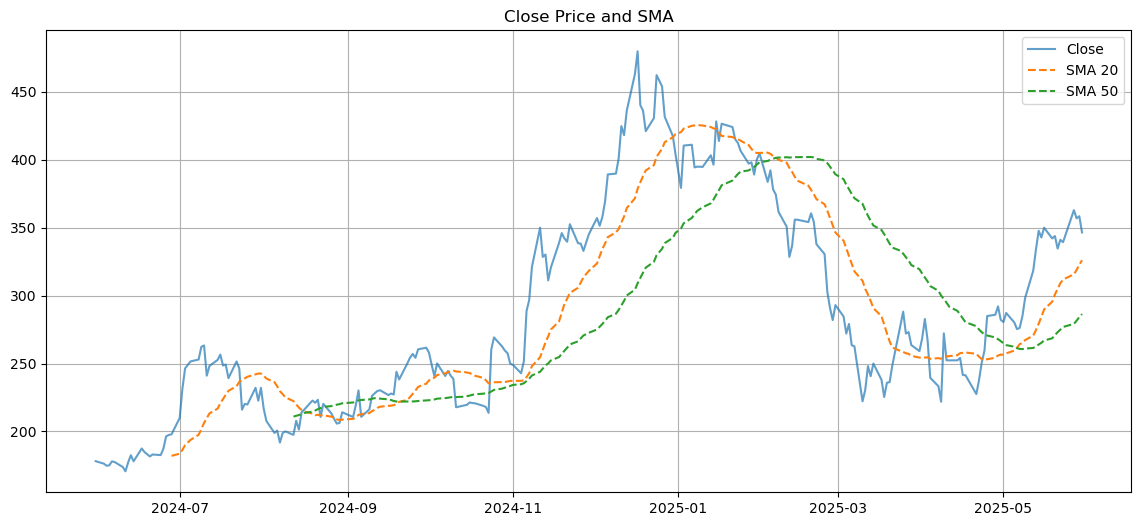

In [43]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['Date'], df['SMA_50'], label='SMA 50', linestyle='--')
plt.legend()
plt.title('Close Price and SMA')
plt.grid(True)
plt.show()

Closing price chart with SMA and EMA

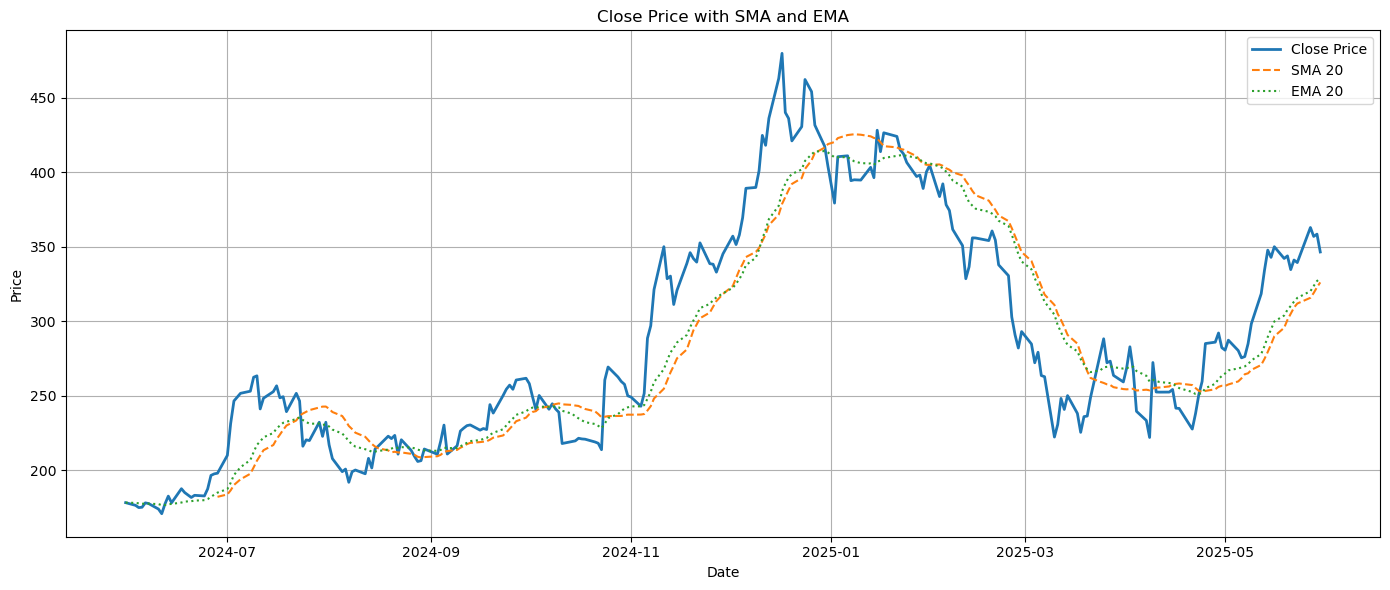

In [44]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', linewidth=2)
plt.plot(df['Date'], df['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df['Date'], df['EMA_20'], label='EMA 20', linestyle=':')
plt.title('Close Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation matrix heatmap

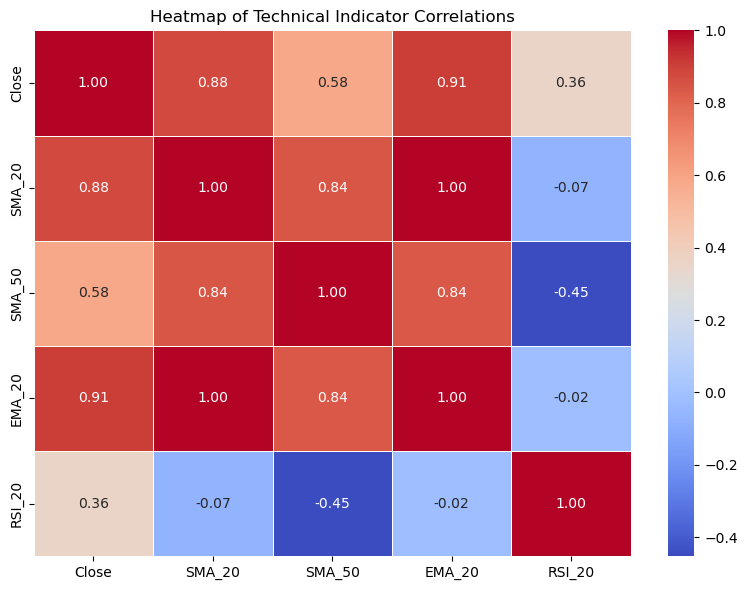

In [45]:
correlation_data = df[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'RSI_20']].dropna()

corr_matrix = correlation_data.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Technical Indicator Correlations')
plt.tight_layout()
plt.show()

Draw chart

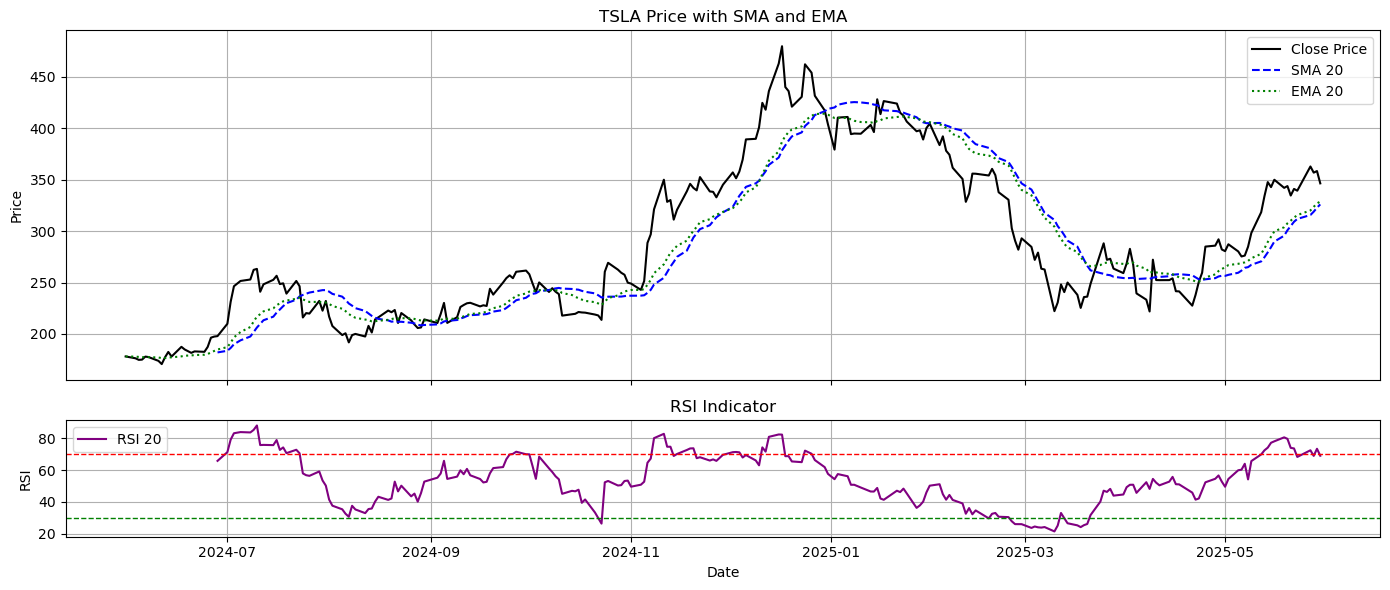

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# --- Diagram of Price and Moving Averages ---
ax1.plot(df['Date'], df['Close'], label='Close Price', color='black', linewidth=1.5)
ax1.plot(df['Date'], df['SMA_20'], label='SMA 20', color='blue', linestyle='--')
ax1.plot(df['Date'], df['EMA_20'], label='EMA 20', color='green', linestyle=':')
ax1.set_title('TSLA Price with SMA and EMA')
ax1.set_ylabel('Price')
ax1.legend()
ax1.grid(True)

# --- Diagram RSI ---
ax2.plot(df['Date'], df['RSI_20'], label='RSI 20', color='purple')
ax2.axhline(70, color='red', linestyle='--', linewidth=1)  # Overbought
ax2.axhline(30, color='green', linestyle='--', linewidth=1)  # Oversold
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.set_title('RSI Indicator')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Close + MACD

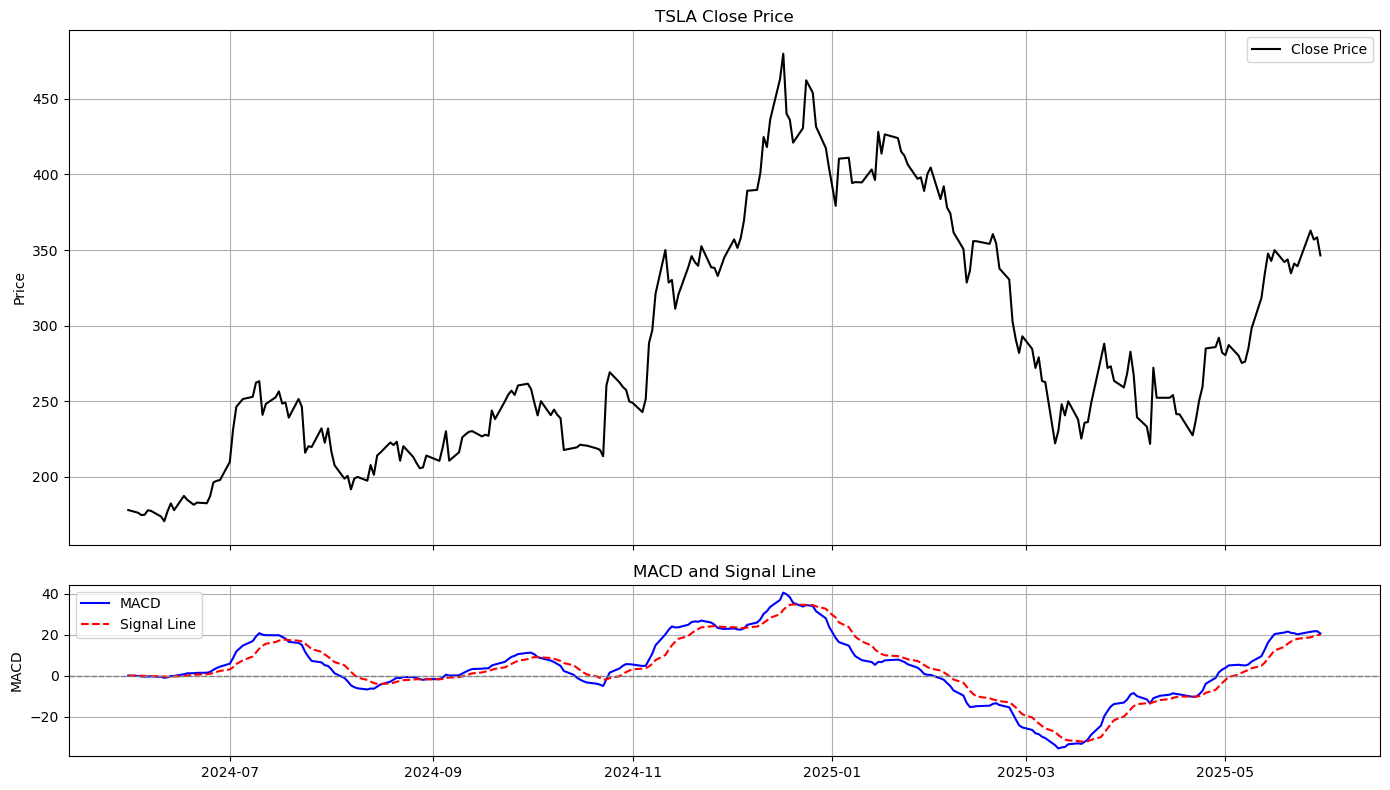

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Trên: Close Price
ax1.plot(df['Date'], df['Close'], label='Close Price', color='black')
ax1.set_title('TSLA Close Price')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.legend()

# Dưới: MACD + Signal
ax2.plot(df['Date'], df['MACD'], label='MACD', color='blue')
ax2.plot(df['Date'], df['Signal Line'], label='Signal Line', color='red', linestyle='--')
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_title('MACD and Signal Line')
ax2.set_ylabel('MACD')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Close + Volume

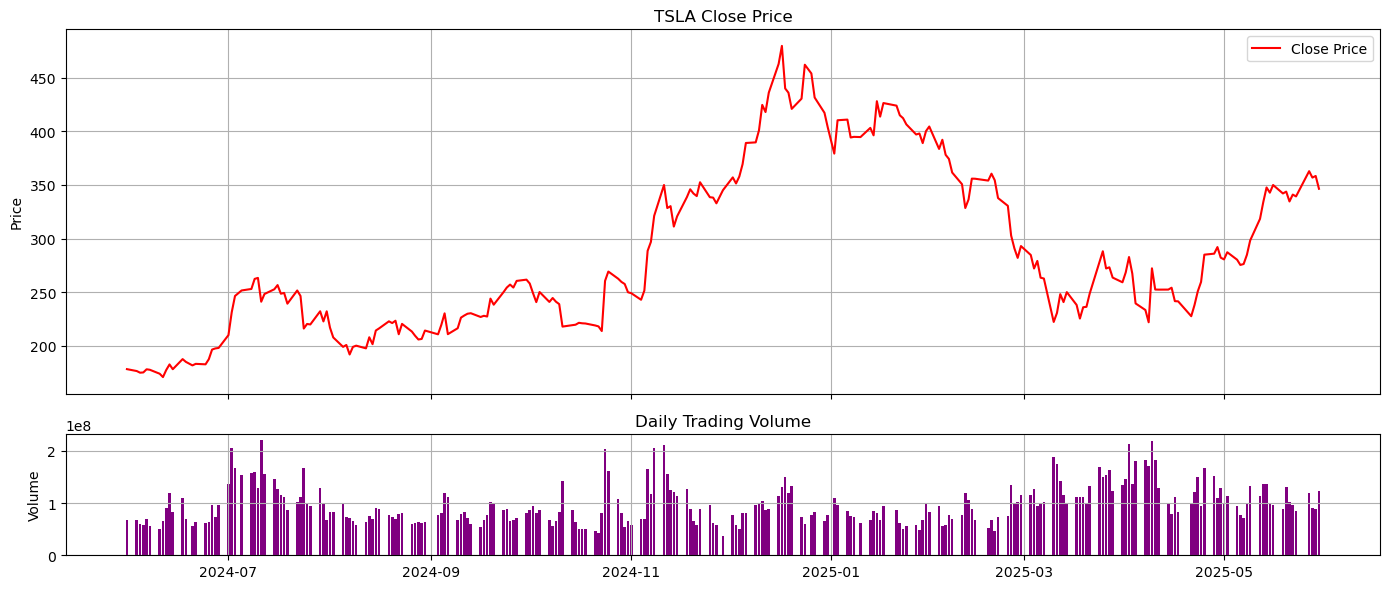

In [48]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Trên: Close Price
ax1.plot(df['Date'], df['Close'], label='Close Price', color='red')
ax1.set_title('TSLA Close Price')
ax1.set_ylabel('Price')
ax1.grid(True)
ax1.legend()

# Dưới: Volume
ax2.bar(df['Date'], df['Volume'], color='purple')
ax2.set_title('Daily Trading Volume')
ax2.set_ylabel('Volume')
ax2.grid(True)

plt.tight_layout()
plt.show()